In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
cars = pd.read_csv('../Data Sets/autoru_cleaned.csv')

In [3]:
cars.head()

,km_age,mark,model,power,segment,state,transmission,year,engine_type,region,body_type,color,drive_type,drive_type_imputed,wheell_type,condition,owners_count,customs_cleared,price
0,60000,KIA,OPTIMA,188,MEDIUM,used,AUTOMATIC,2018,GASOLINE,Зеленоград,седан,синий,передний,0,Левый,Не требует ремонта,1 владелец,Растаможен,1600000
1,74000,AUDI,A4,170,PREMIUM,used,VARIATOR,2012,GASOLINE,Москва,седан,белый,передний,0,Левый,Не требует ремонта,3 или более,Растаможен,1040000
2,39900,GAZ,21,75,MEDIUM,used,MECHANICAL,1970,GASOLINE,Москва,седан,серый,задний,0,Левый,Не требует ремонта,2 владельца,Растаможен,390000
3,120000,TOYOTA,VENZA,185,MEDIUM,used,AUTOMATIC,2013,GASOLINE,Москва,внедорожник 5 дв.,белый,полный,0,Левый,Не требует ремонта,2 владельца,Растаможен,1575000
4,453844,MERCEDES,G_KLASSE,215,PREMIUM,used,AUTOMATIC,2000,GASOLINE,Москва,внедорожник 5 дв.,чёрный,полный,0,Левый,Не требует ремонта,3 или более,Растаможен,1098000


### Проверим есть ли выбросы в данных

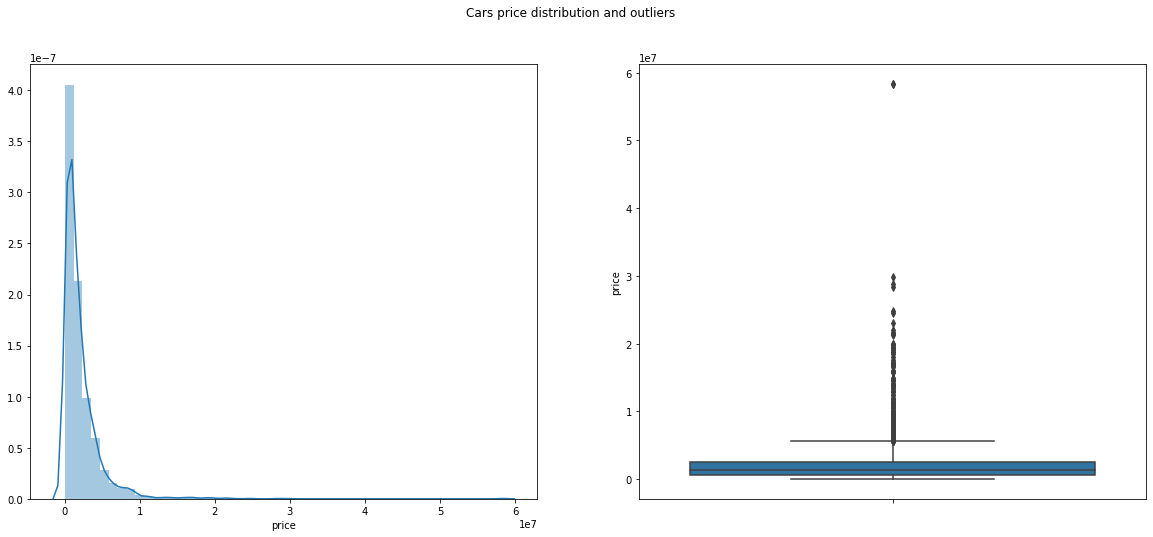

In [4]:
fig, axes = plt.subplots(1, 2, figsize=(20, 8))
fig.suptitle("Cars price distribution and outliers")
sns.distplot(ax=axes[0], a=cars['price']);
sns.boxplot(ax=axes[1], y=cars['price']);

### Рассматривая график выше, можно увидеть много выбросов.

Я найду их и удалю, преобразовав фичу `price` в z-score. Выбросом я буду назвать наблюдения, которое **не** входят в интервал $±3\sigma$.

In [5]:
prices = cars['price']
prices_std = prices.std()
prices_mean = prices.mean()

outliers = []

def z_score(x, mean=prices_mean, std=prices_std):
    z_score = (x - mean)/std
    if z_score > 3 or z_score < -3:
        outliers.append(x)
        print(f'Outlier: {x}')
    return z_score

In [6]:
prices = prices.apply(z_score)

Outlier: 23000000
Outlier: 28300000
Outlier: 28800000
Outlier: 13493200
Outlier: 10996800
Outlier: 21523200
Outlier: 19300000
Outlier: 13052800
Outlier: 15965000
Outlier: 15888000
Outlier: 24900000
Outlier: 10653000
Outlier: 58382604
Outlier: 16798000
Outlier: 15797000
Outlier: 12850000
Outlier: 19300000
Outlier: 13994000
Outlier: 10953800
Outlier: 14500000
Outlier: 10700000
Outlier: 58382604
Outlier: 19449000
Outlier: 21523200
Outlier: 16900000
Outlier: 11007800
Outlier: 11350000
Outlier: 13010200
Outlier: 10738000
Outlier: 19800000
Outlier: 13900000
Outlier: 10524000
Outlier: 21300000
Outlier: 29900000
Outlier: 24555556
Outlier: 13052800
Outlier: 14850000
Outlier: 13493200
Outlier: 11373600
Outlier: 15750000
Outlier: 12500000
Outlier: 22000000
Outlier: 20000000
Outlier: 18800000
Outlier: 11000000
Outlier: 11500000
Outlier: 10900000
Outlier: 18000000
Outlier: 13717000
Outlier: 10500000
Outlier: 16999990
Outlier: 19000000
Outlier: 16500000
Outlier: 17600000
Outlier: 12500000
Outlier: 1

In [7]:
len(outliers)

75

In [8]:
# До
cars.shape

(4891, 19)

In [9]:
indexs = []
for value in outliers:
    for index in cars[cars['price'] == value].index:
        indexs.append(index)

In [10]:
indexs = pd.Series(indexs)
indexs = indexs.drop_duplicates()

In [11]:
len(indexs)

75

In [12]:
cars_no_outliers = cars.copy()
cars_no_outliers = cars_no_outliers.drop(indexs, axis=0)

In [13]:
# После
cars_no_outliers.shape

(4816, 19)

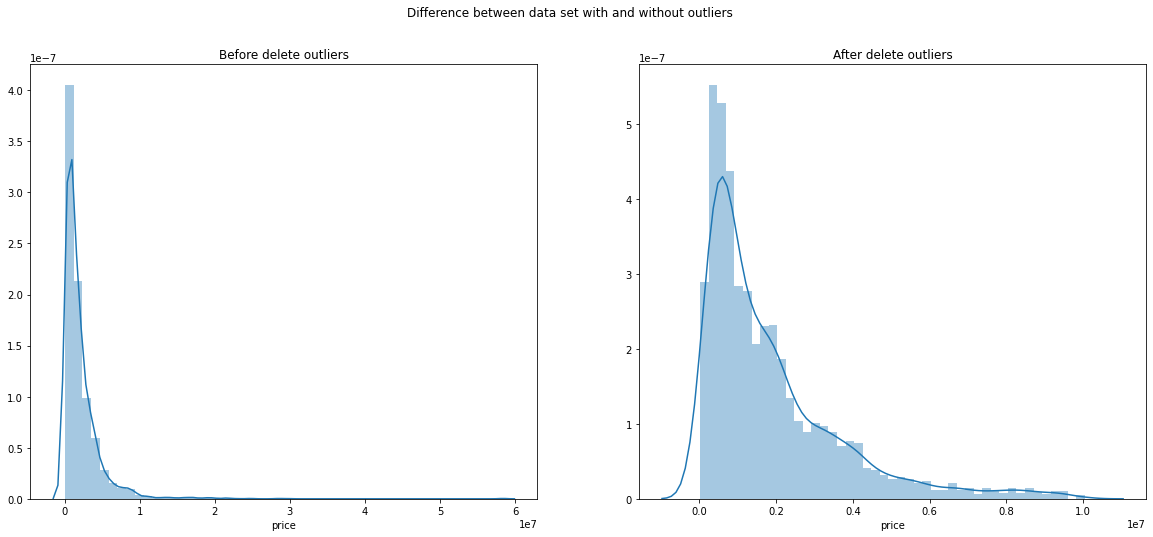

In [14]:
fig, axes = plt.subplots(1, 2, figsize=(20, 8))
fig.suptitle("Difference between data set with and without outliers")
box_plot_before = sns.distplot(ax=axes[0], a=cars['price'])
box_plot_before.set_title('Before delete outliers')
box_plot_after = sns.distplot(ax=axes[1], a=cars_no_outliers['price'])
box_plot_after.set_title('After delete outliers');

In [15]:
cars = cars_no_outliers

#### У меня есть несколько гипотез, которые я бы хотел проверить.
1. Новые автомобили стоят больше, чем подержанные.
2. Чем больше лошадинные сил, тем больше цена.
3. Премиум сегмент, дороже остальных.
4. Чем больше владелецев, тем дешевле цена.
5. Чем старше автомобиль, тем он дешевле.
6. Чем больше пробег, тем дешевле автомобиль.

### 1. Новые автомобили стоят больше, чем подержанные.

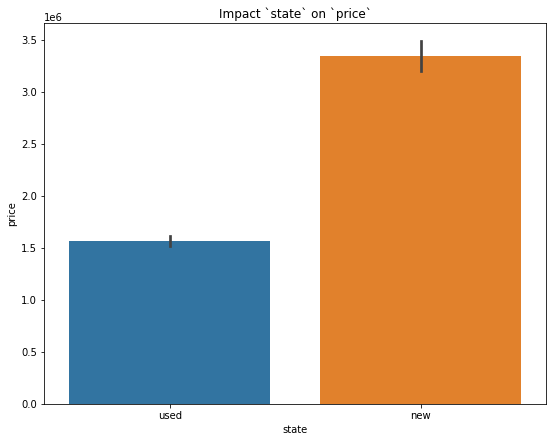

In [16]:
plt.figure(figsize=(9,7))
state_fig = sns.barplot(x='state', y='price', data=cars);
state_fig.set_title("Impact `state` on `price`");

**Вывод:** Гипотеза подтвердилась.

### 2. Чем больше лошадинные сил, тем больше цена.

<Figure size 648x360 with 0 Axes>

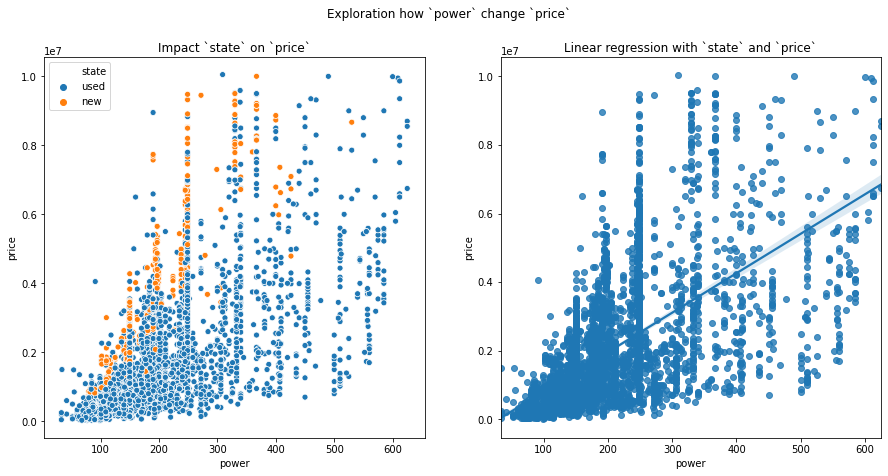

In [17]:
plt.figure(figsize=(9,5))
fig, axes = plt.subplots(1, 2, figsize=(15, 7));
fig.suptitle("Exploration how `power` change `price`")
power_scatter_fig = sns.scatterplot(ax=axes[0], x='power', y='price', hue='state', data=cars);
power_scatter_fig.set_title("Impact `state` on `price`");
regplot_scatter_fig = sns.regplot(ax=axes[1], x='power', y='price', data=cars);
regplot_scatter_fig.set_title("Linear regression with `state` and `price`");

**Вывод:** Гипотеза подтвердилась.

### 3. Премиум сегмент, дороже остальных.

In [19]:
def cat_plots(order, feature, nrows=1, ncols=3, figsize=(15, 9)):
    fig, axes = plt.subplots(nrows, ncols, figsize=figsize)
    fig.suptitle(f'{feature.capitalize()} exploration')
    segment_countplot = sns.countplot(ax=axes[0], y=feature, data=cars, 
                 order=order);
    segment_countplot.set_title(f'Countplot of `{feature}`')

    segment_countplot = sns.barplot(ax=axes[1], x=feature, y='price', data=cars, 
               order=order);
    segment_countplot.set_title(f'Impact `{feature}` on `price`')

    segment_countplot = sns.boxplot(ax=axes[2], x=feature, y='price', data=cars, 
               order=order);
    segment_countplot.set_title('Outliers check');

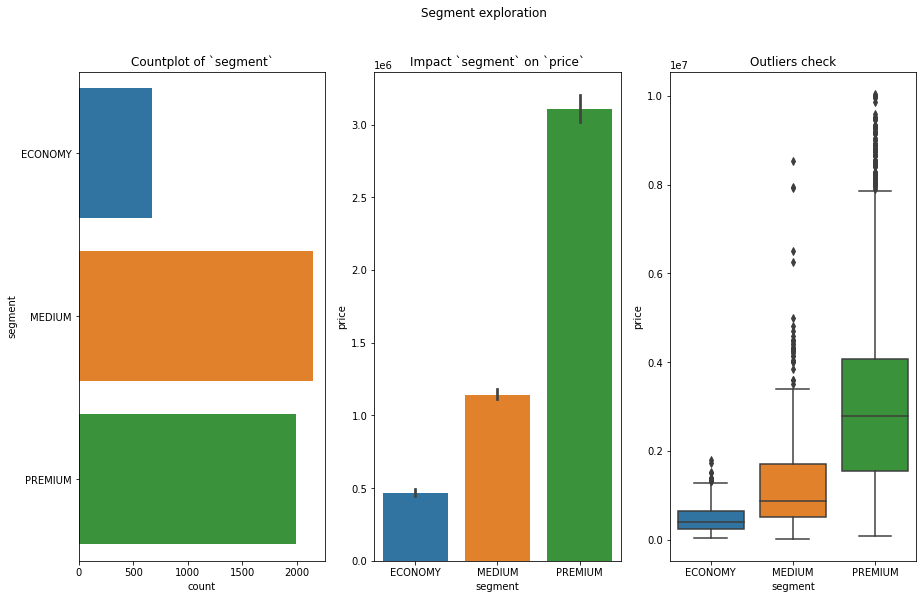

In [20]:
cat_plots(order=['ECONOMY', 'MEDIUM', 'PREMIUM'], feature='segment')

**Вывод:** Гипотеза подтвердилась. И также у категории `PREMIUM` много выбросов.

### 4. Чем больше владелецев, тем дешевле цена.

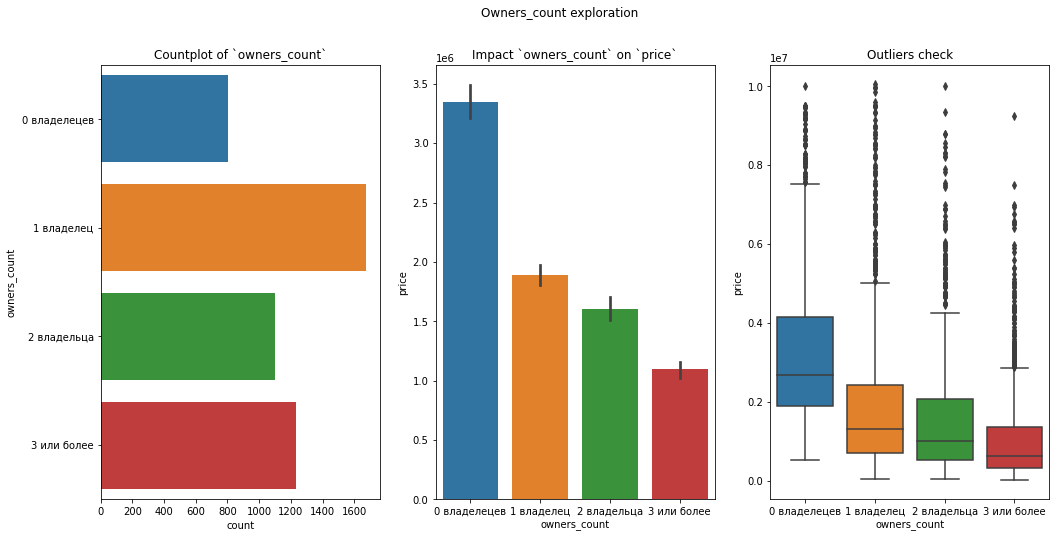

In [21]:
cat_plots(order=["0 владелецев", "1\xa0владелец", "2\xa0владельца", "3 или более"], feature='owners_count', figsize=(17, 8))

**Вывод:** Гипотеза подтвердилась.

### 5. Чем старше автомобиль, тем он дешевле.

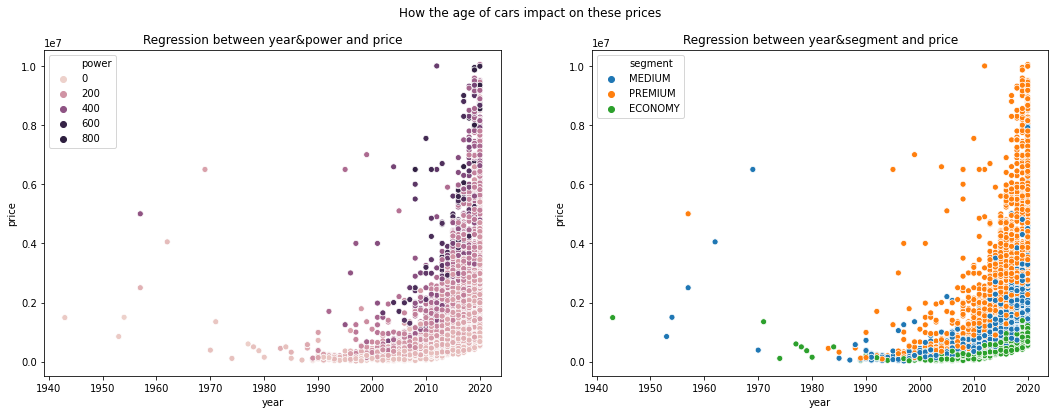

In [22]:
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

fig.suptitle('How the age of cars impact on these prices')
year_power_scatter = sns.scatterplot(ax=axes[0], data=cars, x='year', y='price', hue='power');
year_power_scatter.set_title("Regression between year&power and price")
year_segment_scatter = sns.scatterplot(ax=axes[1], data=cars, x='year', y='price', hue='segment');
year_segment_scatter.set_title("Regression between year&segment and price");

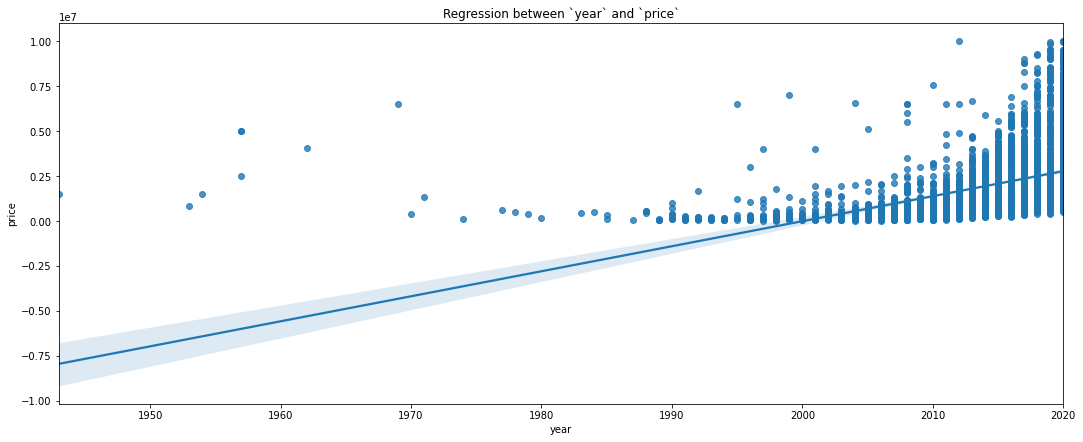

In [23]:
plt.figure(figsize=(18,7))
year_regplot = sns.regplot(x='year', y='price', data=cars)
year_regplot.set_title("Regression between `year` and `price`");

**Вывод:** Гипотеза подтвердилась. 

### 6. Чем больше пробег, тем дешевле автомобиль.

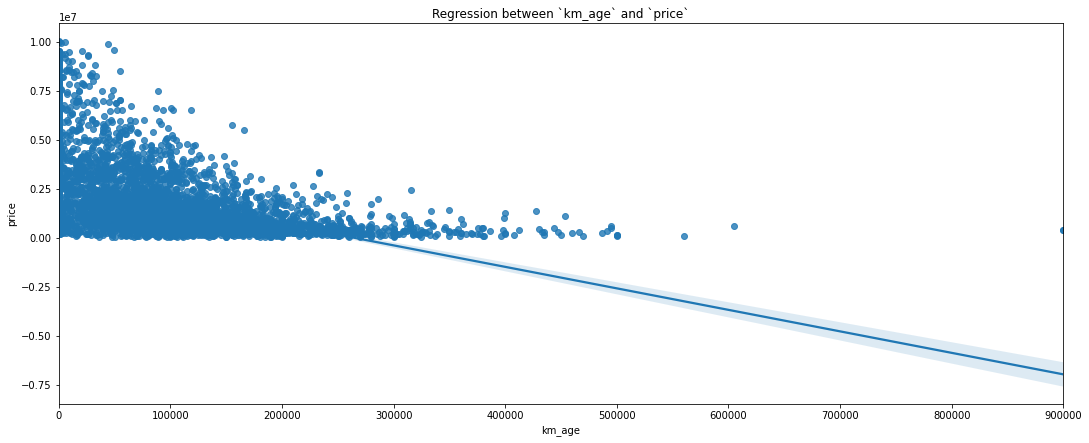

In [25]:
plt.figure(figsize=(18,7))
year_regplot = sns.regplot(x='km_age', y='price', data=cars)
year_regplot.set_title("Regression between `km_age` and `price`");

####  Итог проверки гипотезы:
1. Новые автомобили стоят больше, чем подержанные.$\color{green}{\text{Подтвердилась}}$
2. Чем больше лошадинные сил, тем больше цена.$\color{green}{\text{Подтвердилась}}$
3. Премиум сегмент, дороже остальных.$\color{green}{\text{Подтвердилась}}$
4. Чем больше владелецев, тем дешевле цена.$\color{green}{\text{Подтвердилась}}$
5. Чем старше автомобиль, тем он дешевле.$\color{green}{\text{Подтвердилась}}$
6. Чем больше пробег, тем дешевле автомобиль.$\color{green}{\text{Подтвердилась}}$

### Посмотрим на другие фичи, попробуем отрыть инсайты.

### Посмотрим на `drive_type`

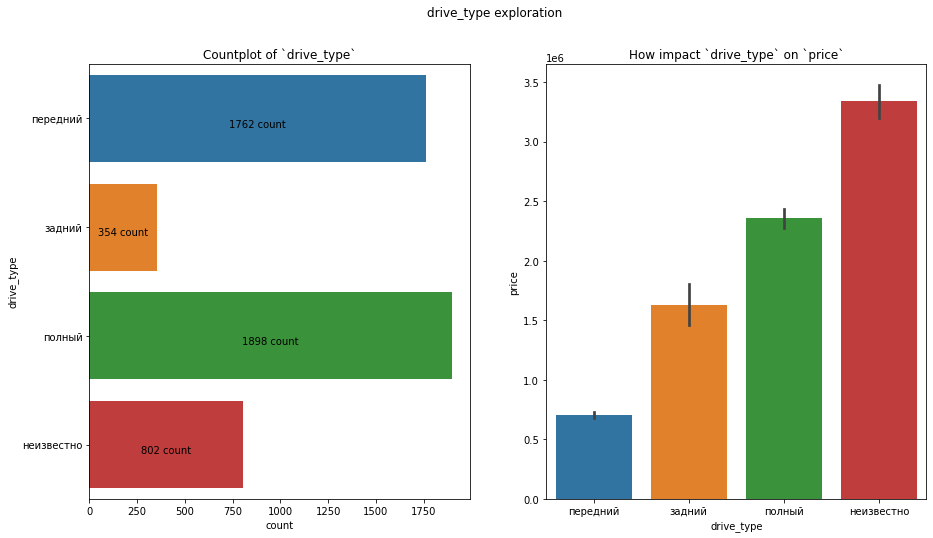

In [27]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 8))
fig.suptitle("drive_type exploration")
countplot = sns.countplot(ax=axes[0], y='drive_type', data=cars);
countplot.set_title('Countplot of `drive_type`')
barplot = sns.barplot(ax=axes[1], data=cars, x='drive_type', y='price');
barplot.set_title('How impact `drive_type` on `price`')
for p in countplot.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    width = p.get_width()
    countplot.annotate(f'{width} count', (x.mean(), (y - 0.35)), ha='center', va='center')

`drive_type` принесет мало пользы, поскольку самая большая цена у категории "неизвестно". А "неизвестно" означает, что автомобиль новый. И из-за того, что он новый у него большая цена.

### Исследуем `engine_type`

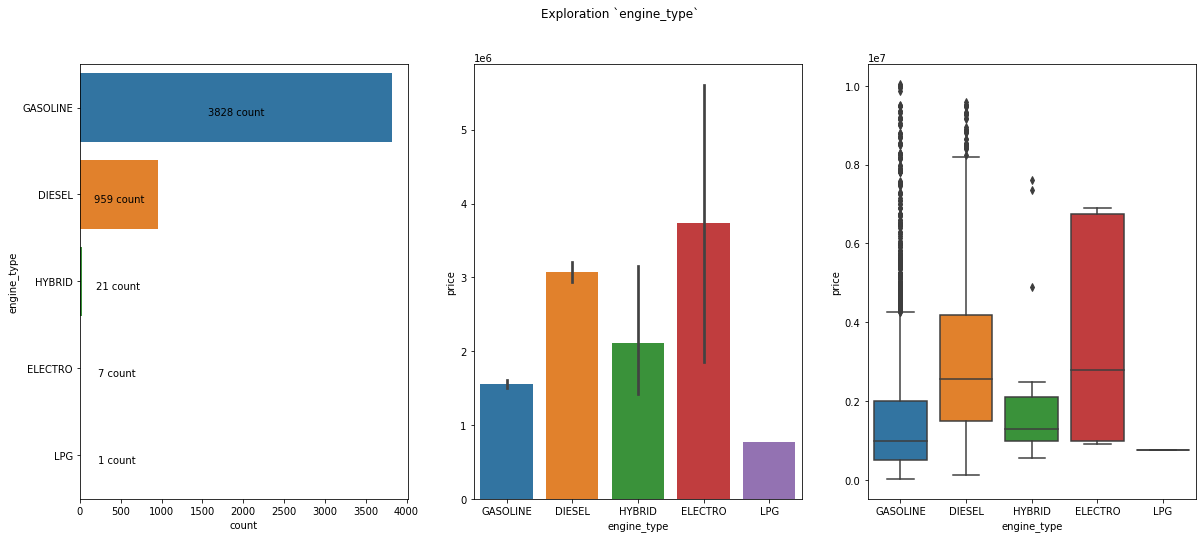

In [28]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 8))
fig.suptitle("Exploration `engine_type`")
countplot = sns.countplot(ax=axes[0], y='engine_type', data=cars);
sns.barplot(ax=axes[1], data=cars, x='engine_type', y='price');
sns.boxplot(ax=axes[2], data=cars, x='engine_type', y='price');
for p in countplot.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    width = p.get_width()
    if width > 900:
        countplot.annotate(f'{width} count', (x.mean(), (y - 0.35)), ha='center', va='center')
    else:
        countplot.annotate(f'{width} count', (x.max() + 450, (y - 0.35)), ha='center', va='center')

У типов: "Гибрид", "Электро", "LPG" - мало наблюдений. Это плохо потому что модель не сможет хорошо натренироваться для этих типов.

#### Проверим еще одну гитопезу - "У автомобилей в `ECONOMY` сегменте меньше лошадиных сил".

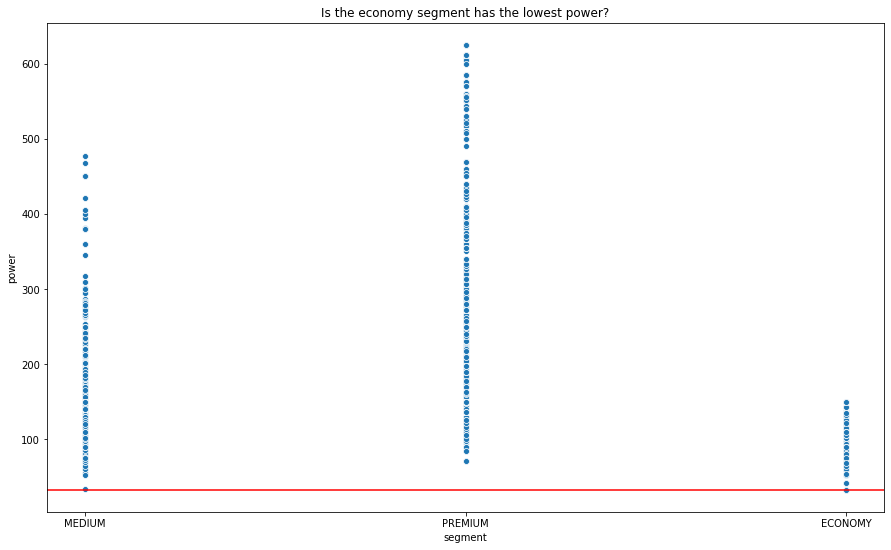

In [29]:
plt.figure(figsize=(15,9))
power_enconomy = sns.scatterplot(data=cars, y='power', x='segment');
economy_power_min = cars[cars['segment'] == 'ECONOMY']['power'].min()
plt.axline((0, economy_power_min), (2, economy_power_min), color='red');
power_enconomy.set_title("Is the economy segment has the lowest power?");

In [30]:
for segment in cars['segment'].unique():
    print(f'Segment: {segment}, mean value: {round(cars[cars["segment"] == segment]["power"].mean(), 2)}')

Segment: MEDIUM, mean value: 152.24
Segment: PREMIUM, mean value: 264.98
Segment: ECONOMY, mean value: 99.44


"У автомобилей в `ECONOMY` сегменте меньше лошадиных сил". - **Ложь**
##### НО
"У автомобилей в `ECONOMY` сегменте ***в среднем*** меньше лошадиных сил". - **Правда**

#### У большинства автомобилей в `ECONOMY` сегменте дизель

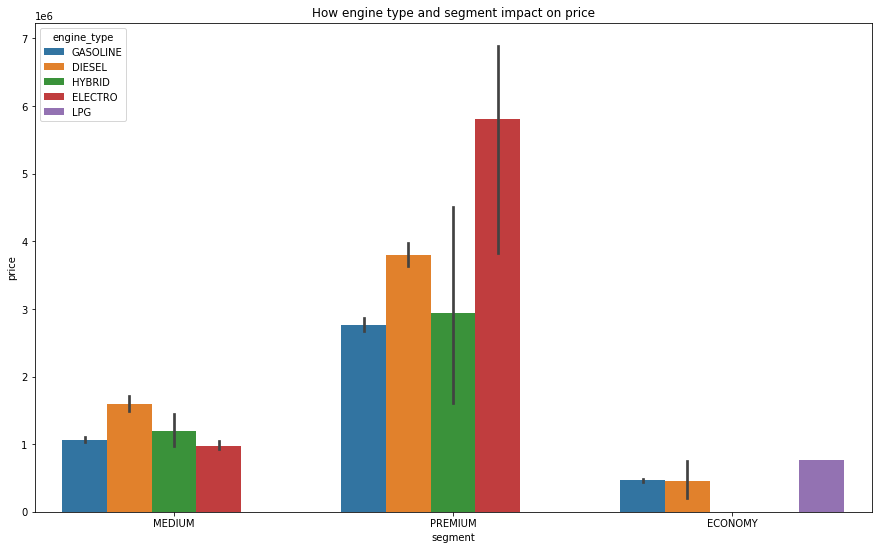

In [31]:
plt.figure(figsize=(15,9))
segment_engine_bar = sns.barplot(data=cars, y='price', x='segment', hue='engine_type');
segment_engine_bar.set_title("How engine type and segment impact on price");

**Гипотеза не подтвердилась.**

### Автомобиль какого цвета стоит дороже всего?

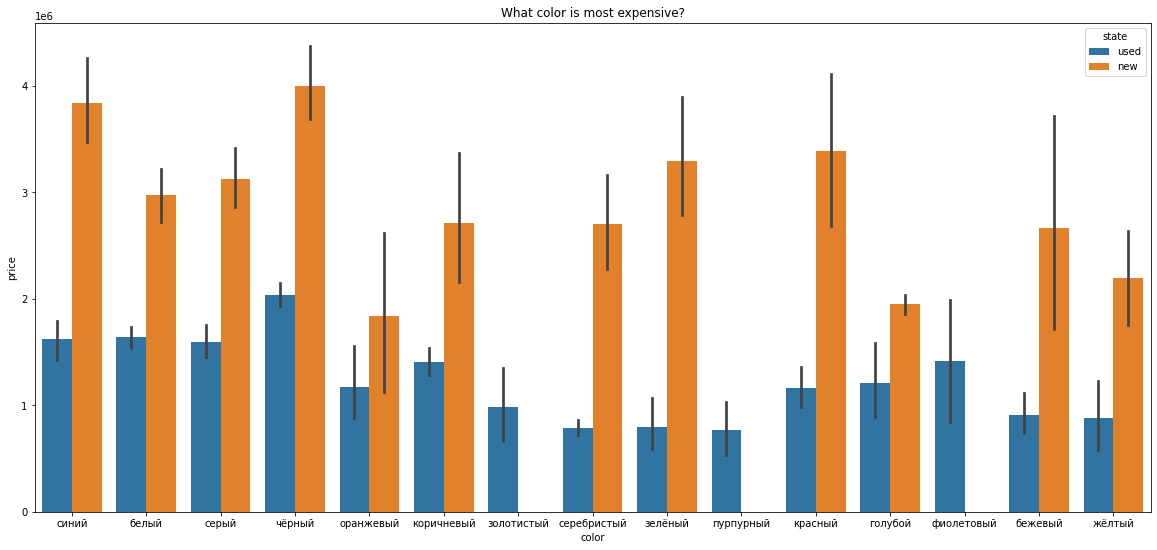

In [32]:
plt.figure(figsize=(20,9))
color_price = sns.barplot(data=cars, y='price', x='color', hue='state');
color_price.set_title("What color is most expensive?");

In [33]:
color_n_price = []
for color in cars['color'].unique():
    mean_price = round(cars[cars["color"] == color]["price"].mean(), 2)
    color_n_price.append({"color": color, "mean_price": mean_price})

print(pd.DataFrame(color_n_price).nlargest(5, 'mean_price'))

        color  mean_price
3      чёрный  2313334.05
0       синий  2140263.23
2       серый  1946682.99
1       белый  1903897.62
5  коричневый  1593404.50


Дороже всего стоит автомобили черного цвета. Но держать в уме количество количество автомобилей определенного цвета и размах цен.

### Заенкодим категориальные фичи
Для этого я буду использовать LabelEncoder, чтобы не добавлять новых колонок.

In [34]:
from sklearn.preprocessing import LabelEncoder

In [35]:
cat_columns = cars.select_dtypes('object').columns
cat_columns[0:5]

Index(['mark', 'model', 'segment', 'state', 'transmission'], dtype='object')

In [36]:
cars_encoded = cars.copy()

In [37]:
label_encoder = LabelEncoder()
for col in cat_columns:
    cars_encoded[col] = label_encoder.fit_transform(cars_encoded[col])

In [38]:
cars_encoded.dtypes, cars_no_outliers.dtypes

(km_age                int64
 mark                  int64
 model                 int64
 power                 int64
 segment               int64
 state                 int64
 transmission          int64
 year                  int64
 engine_type           int64
 region                int64
 body_type             int64
 color                 int64
 drive_type            int64
 drive_type_imputed    int64
 wheell_type           int64
 condition             int64
 owners_count          int64
 customs_cleared       int64
 price                 int64
 dtype: object,
 km_age                 int64
 mark                  object
 model                 object
 power                  int64
 segment               object
 state                 object
 transmission          object
 year                   int64
 engine_type           object
 region                object
 body_type             object
 color                 object
 drive_type            object
 drive_type_imputed     int64
 wheell_type 

### Напоследок визуализирую корреляцию между фичами

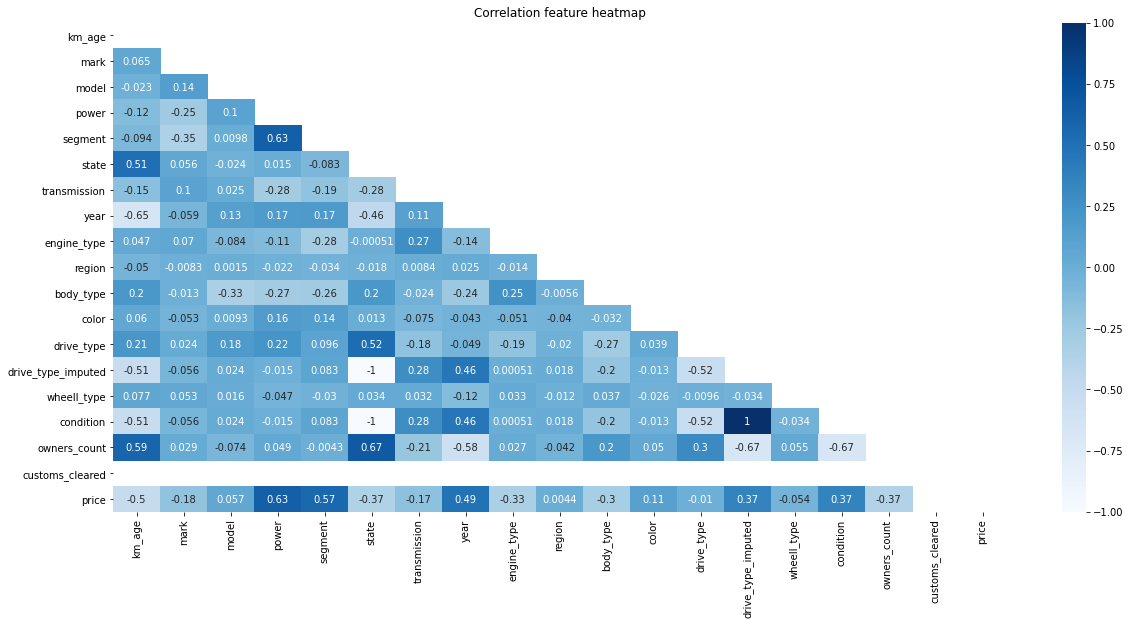

In [39]:
plt.figure(figsize=(20, 9))
corr = cars_encoded.corr()
mask = np.triu(corr)
corr_heatmap = sns.heatmap(corr, mask=mask, annot=True, cmap='Blues');
corr_heatmap.set_title("Correlation feature heatmap");

Фича customs_cleared оказалась бесполезно, поскольку все автомобили на Auto.ru растаможены. Дропнем ее.

In [40]:
cars_encoded = cars_encoded.drop('customs_cleared', axis=1)

In [41]:
cars_encoded.to_csv('../Data Sets/cars_encoded_no_outliers.csv', index=False)